### 팀명 : 교수님 소고기 사주세요,,,

팀원 1 : 장흐권, 202001549

팀원 2 : 지은미, 202001555

In [350]:
import re, math, random
import matplotlib.pyplot as plt
import matplotlib
import scipy.ndimage
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
import glob
from collections import defaultdict, Counter
from functools import partial, reduce
from IPython.core.interactiveshell import InteractiveShell
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('seaborn')
sns.set(font_scale=2.5)

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

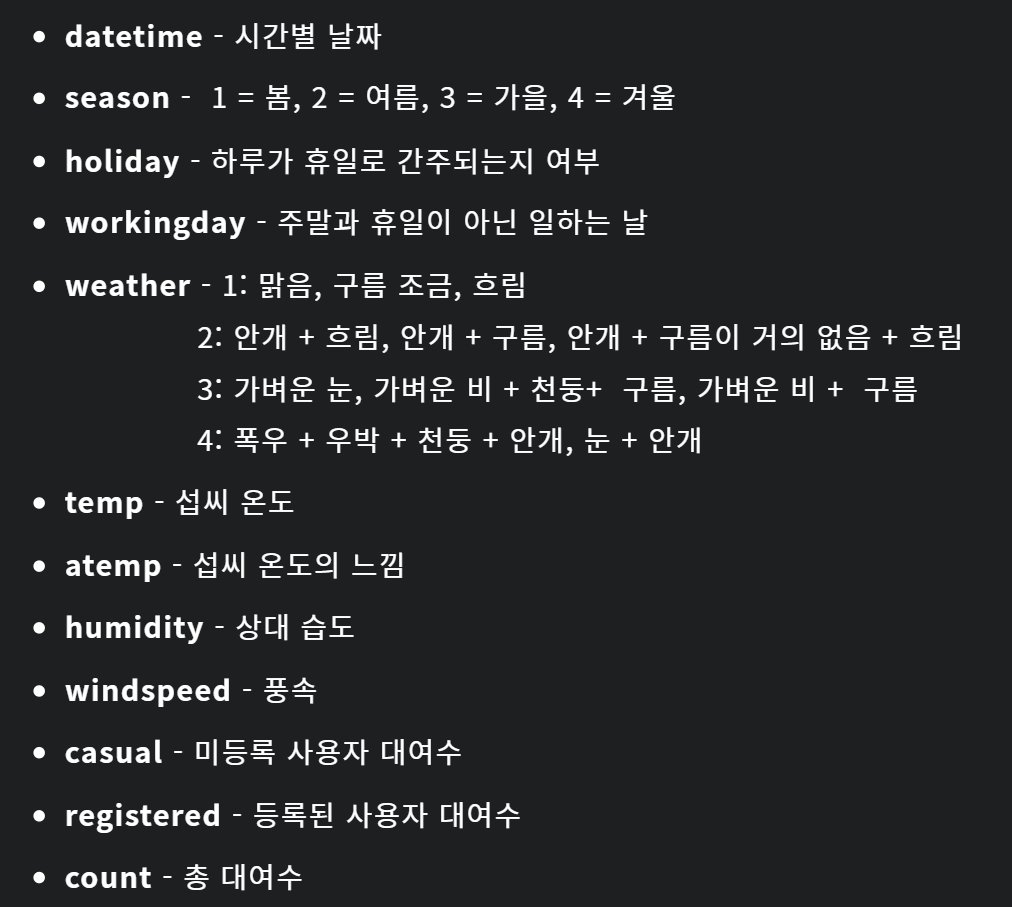

In [351]:
# train 셋 불러오기
train_data_set = pd.read_csv("./data/train_data/train_data.csv")
# test 셋 불러오기
test_data_set = pd.read_csv("./data/test_data/test_data.csv")

In [352]:
# train 셋 확인
train_data_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [353]:
# test 셋 확인
test_data_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


## 데이터 시각화

In [354]:
# train, test 셋 datetime 설정
# -> object Type은 RanmdomForest의 입력 타입으로 적절하지 않으므로 int Type로 저장한다.

train_data_set['datetime'] = pd.to_datetime(train_data_set['datetime'])

train_data_set["year"] = train_data_set["datetime"].dt.year
train_data_set["month"] = train_data_set["datetime"].dt.month
train_data_set["day"] = train_data_set["datetime"].dt.day
train_data_set["hour"] = train_data_set["datetime"].dt.hour
train_data_set["minute"] = train_data_set["datetime"].dt.minute
train_data_set["second"] = train_data_set["datetime"].dt.second
train_data_set["dayofweek"] = train_data_set["datetime"].dt.dayofweek


test_data_set['datetime'] = pd.to_datetime(test_data_set['datetime'])

test_data_set["year"] = test_data_set["datetime"].dt.year
test_data_set["month"] = test_data_set["datetime"].dt.month
test_data_set["day"] = test_data_set["datetime"].dt.day
test_data_set["hour"] = test_data_set["datetime"].dt.hour
test_data_set["minute"] = test_data_set["datetime"].dt.minute
test_data_set["second"] = test_data_set["datetime"].dt.second
test_data_set["dayofweek"] = test_data_set["datetime"].dt.dayofweek

<ipython-input-355-54851182ba08>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tmp = train_data_set[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)


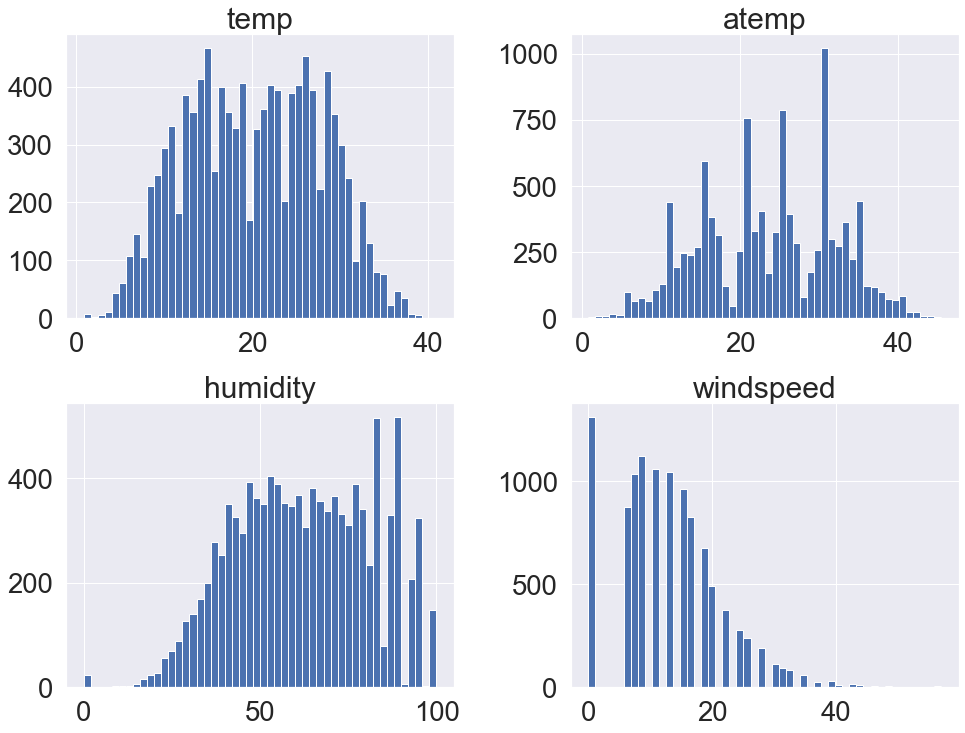

In [355]:
fig, ax = plt.subplots(figsize=(16,12))
 
tmp = train_data_set[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)

plt.show()

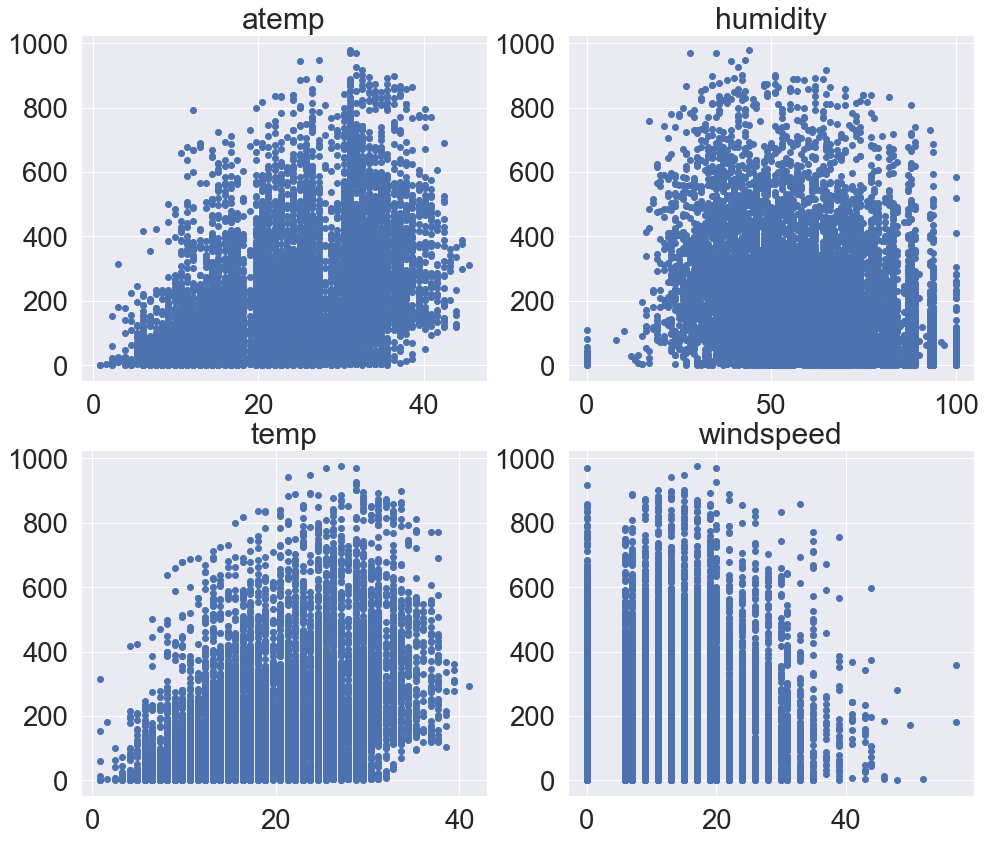

In [356]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
# scatter plot
tmp = ax[0][0].scatter(train_data_set['atemp'], train_data_set['count'])
tmp = ax[0][1].scatter(train_data_set['humidity'], train_data_set['count'])
tmp = ax[1][0].scatter(train_data_set['temp'], train_data_set['count'])
tmp = ax[1][1].scatter(train_data_set['windspeed'], train_data_set['count'])
 
# title 지정
tmp = ax[0][0].set(title='atemp')
tmp = ax[0][1].set(title='humidity')
tmp = ax[1][0].set(title='temp')
tmp = ax[1][1].set(title='windspeed')
 
plt.show()

풍속에서 데이터가 0인 값들이 많다.

이 값들을 바꿔져야 한다.

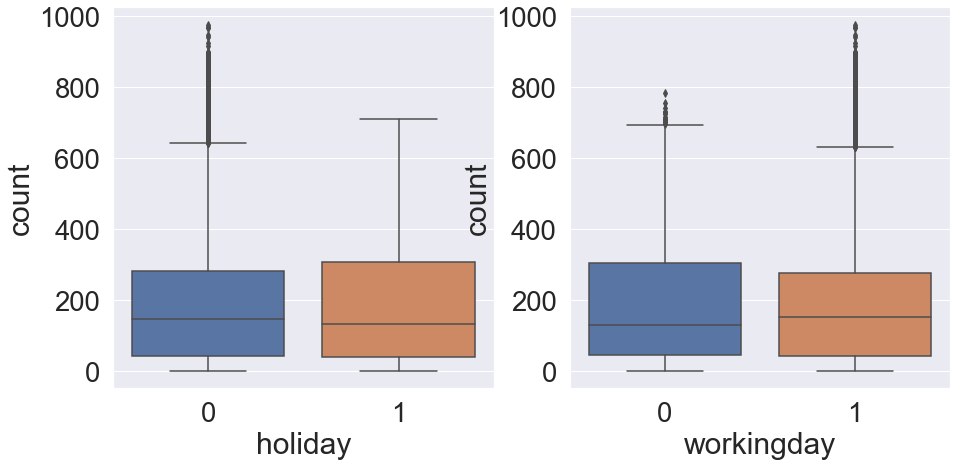

In [357]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# holiday 와 workingday 의 이용자수 상관관계
tmp = sns.boxplot(data=train_data_set, x='holiday', y='count', ax=ax[0])
tmp = sns.boxplot(data=train_data_set, x='workingday', y='count', ax=ax[1])
 
plt.show()

휴일과 출근일은 대여량에 큰 영향을 안 준다.

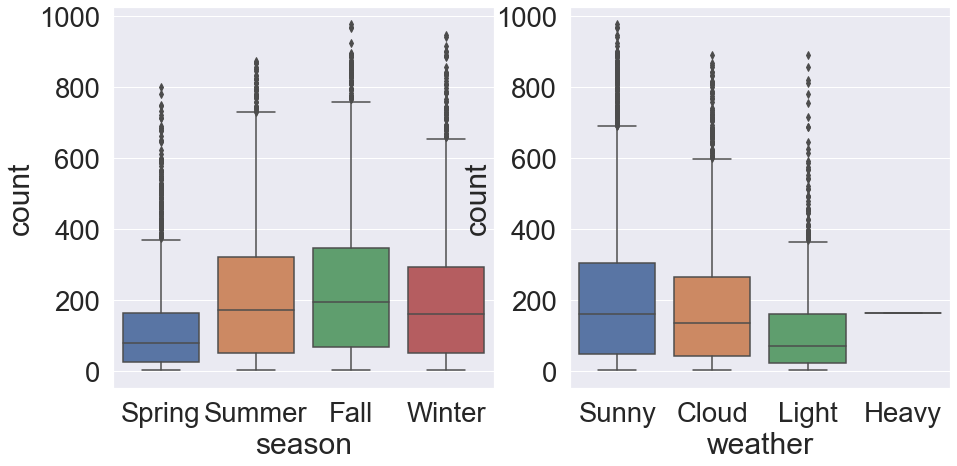

In [358]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# season 와 weather 의 이용자 상관관계
tmp = sns.boxplot(data=train_data_set, x='season', y='count', ax=ax[0])
tmp = sns.boxplot(data=train_data_set, x='weather', y='count', ax=ax[1])
 
#x축 이름 변경
tmp = ax[0].set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
tmp = ax[1].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])
 
plt.show()

계절과 날씨는 대여량에 영향을 준다.

날씨가 안 좋은 날에는 대여량이 거의 없다.

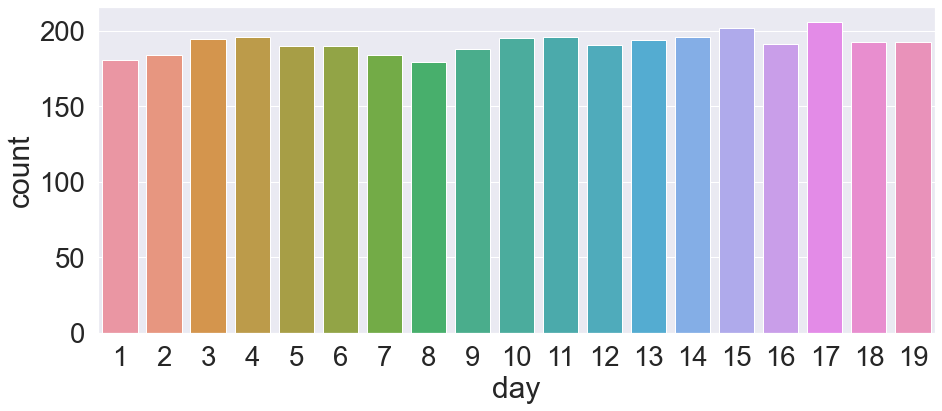

In [359]:
fig, ax = plt.subplots(figsize=(15,6))
 
tmp = sns.barplot(data=train_data_set, x='day', y='count', ax=ax, ci=None)
 
plt.show()

일수는 대여량에 영향을 안 준다.

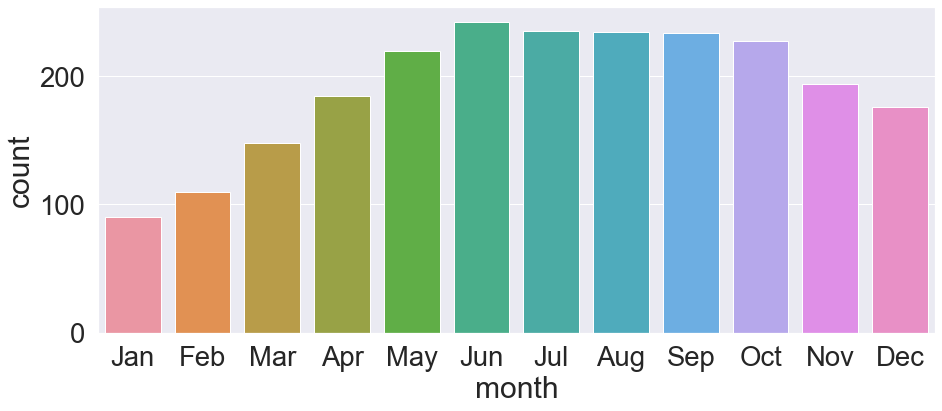

In [360]:
fig, ax = plt.subplots(figsize=(15,6))
 
# 월별 대여량
tmp = sns.barplot(data=train_data_set, x='month', y='count', ax=ax, ci=None)

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
tmp = ax.set(xticklabels=labels)

plt.show()

월은 대여량에 영향을 준다.

6월 부터 10월까지 이용 고객이 많다.

즉 여름과 가을에 이용 고객이 많다.

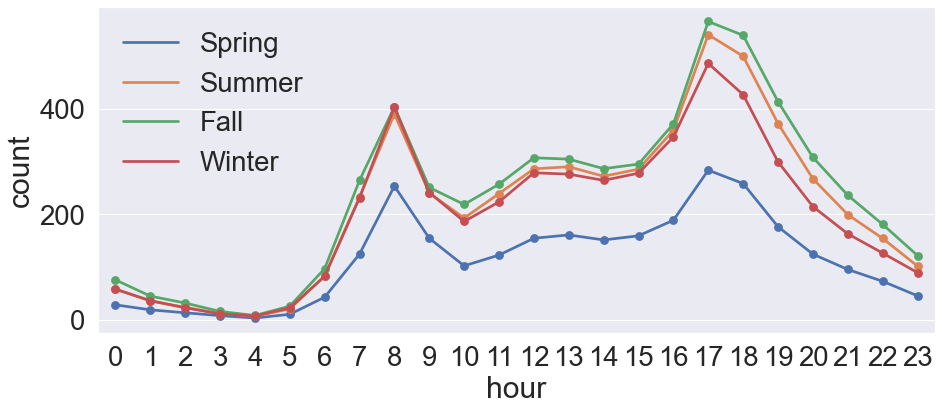

In [361]:
fig, ax = plt.subplots(figsize=(15,6))
 
tmp = sns.pointplot(data=train_data_set, x='hour', y='count',hue='season', ax=ax, ci=None)
 
labels = ['Spring', 'Summer', 'Fall', 'Winter']
tmp = ax.legend(labels=labels)
 
plt.show()

계절은 대여량에 영향을 준다.

주로 출퇴근 시간에 이용을 많이 한다.

다른 계절에 비해 겨울에는 이용 고객의 수가 적다.

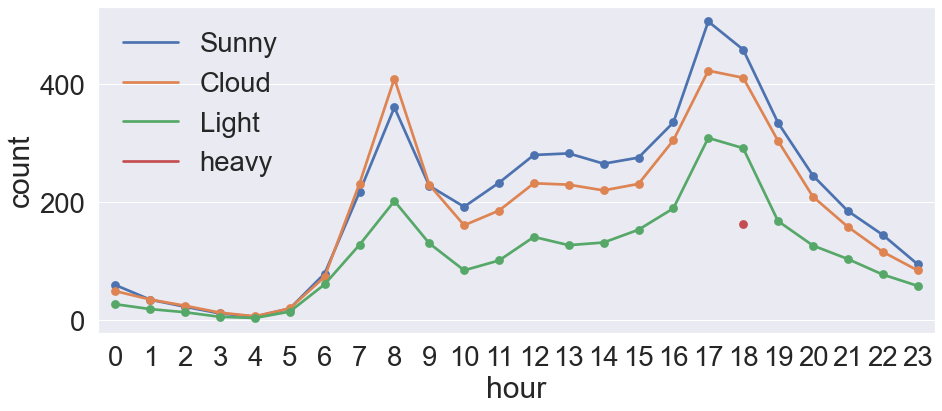

In [362]:
fig, ax = plt.subplots(figsize=(15,6))
 
# 날씨에 따른 시간별 대여량
tmp = sns.pointplot(data=train_data_set, x='hour', y='count',hue='weather', ax=ax, ci=None)
 
# x축 값이름 변경
labels = ['Sunny', 'Cloud', 'Light', 'heavy']
tmp = ax.legend(labels=labels)
 
plt.show()

날씨는 대여량에 영향을 준다.

주로 출퇴근 시간에 이용을 많이 한다.

날씨가 매우 안 좋은 날에는 이용고객이 없다.

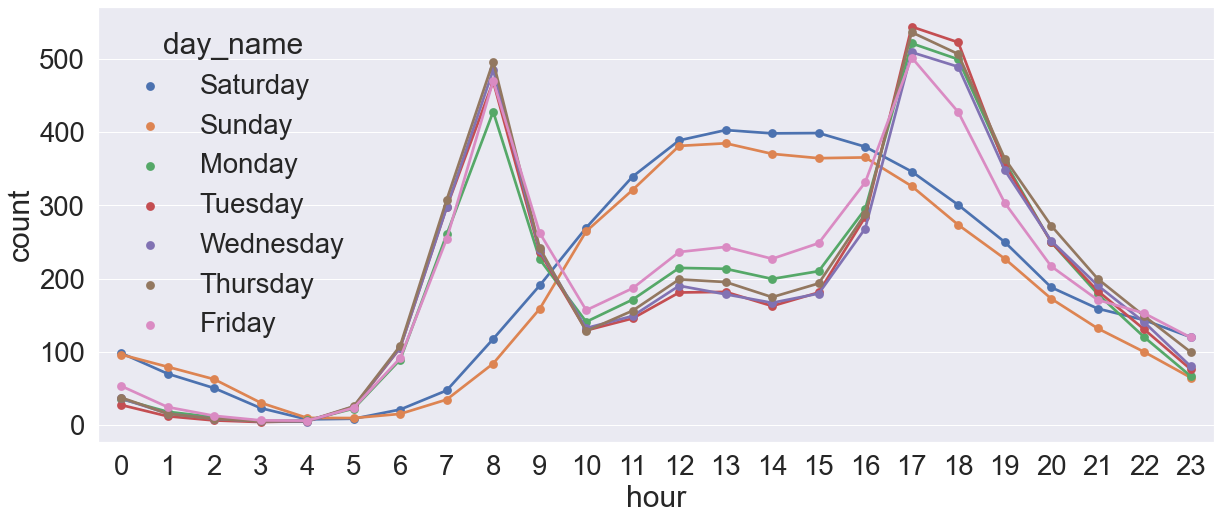

In [363]:
train_data_set['day_name'] = train_data_set['datetime'].dt.day_name()
 
fig, ax = plt.subplots(figsize=(20,8))
 
# 요일에 따른 시간별 대여량
tmp = sns.pointplot(data=train_data_set, x='hour', y='count',hue='day_name', ax=ax, ci=None)
 
plt.show()

요일은 대여량에 영향을 준다.

평일에는 주로 출퇴근 시간
1. 출근 : 7시 ~ 9시
2. 퇴근 : 16시 ~ 19시

주말에는 주로 낮 시간대
1. 낮 : 11시 ~ 16시

## 데이터 변환

In [364]:
train_data_set = pd.read_csv("./data/train_data/train_data.csv")
test_data_set = pd.read_csv("./data/test_data/test_data.csv")

In [365]:
train_data_set['datetime'] = pd.to_datetime(train_data_set['datetime'])

train_data_set["year"] = train_data_set["datetime"].dt.year
train_data_set["month"] = train_data_set["datetime"].dt.month
train_data_set["day"] = train_data_set["datetime"].dt.day
train_data_set["hour"] = train_data_set["datetime"].dt.hour
train_data_set["minute"] = train_data_set["datetime"].dt.minute
train_data_set["second"] = train_data_set["datetime"].dt.second
train_data_set["dayofweek"] = train_data_set["datetime"].dt.dayofweek


test_data_set['datetime'] = pd.to_datetime(test_data_set['datetime'])

test_data_set["year"] = test_data_set["datetime"].dt.year
test_data_set["month"] = test_data_set["datetime"].dt.month
test_data_set["day"] = test_data_set["datetime"].dt.day
test_data_set["hour"] = test_data_set["datetime"].dt.hour
test_data_set["minute"] = test_data_set["datetime"].dt.minute
test_data_set["second"] = test_data_set["datetime"].dt.second
test_data_set["dayofweek"] = test_data_set["datetime"].dt.dayofweek

In [366]:
# 풍속이 0인 친구들 평균으로 업데이트
train_data_set.loc[train_data_set["windspeed"] == 0, "windspeed"] = train_data_set["windspeed"].mean()
test_data_set.loc[train_data_set["windspeed"] == 0, "windspeed"] = train_data_set["windspeed"].mean()

풍속이 0인값 수정

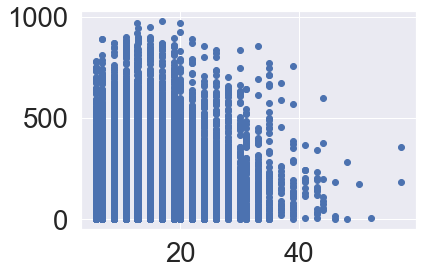

In [367]:
tmp = plt.scatter(train_data_set['windspeed'], train_data_set['count'])

plt.show()

In [368]:
# train_data_set에서 필요없는 항목 삭제 후 train에 업데이트
train = train_data_set.drop(["count", "datetime", "casual", "registered"], axis=1)
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,1,0,0,1,9.84,14.395,81,12.799395,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,12.799395,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,12.799395,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,12.799395,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,12.799395,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,19,0,0,2
10882,4,0,1,1,14.76,17.425,57,15.001300,2012,12,19,20,0,0,2
10883,4,0,1,1,13.94,15.910,61,15.001300,2012,12,19,21,0,0,2
10884,4,0,1,1,13.94,17.425,61,6.003200,2012,12,19,22,0,0,2


In [369]:
# test_data_set에서 필요없는 항목 삭제 후 test에 업데이트
test = test_data_set.drop("datetime", axis=1)
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


In [370]:
# 모델링
rf = RandomForestRegressor(n_jobs=4)
# 학습
rf.fit(train, train_data_set["count"])
# 예측
test_data_set["count"] = rf.predict(test)
test_data_set.head()

RandomForestRegressor(n_jobs=4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,13.17
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,6.96
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,5.78
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,3.22
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,2.94


In [371]:
sub = pd.read_csv("./data/sample_data/sample_data.csv")
sub["count"]=result
sub.head()

,datetime,count
0,2011-01-20 00:00:00,13.88
1,2011-01-20 01:00:00,6.28
2,2011-01-20 02:00:00,5.74
3,2011-01-20 03:00:00,3.29
4,2011-01-20 04:00:00,2.80


In [372]:
sub.to_csv("bike_sharing.csv",index = False)

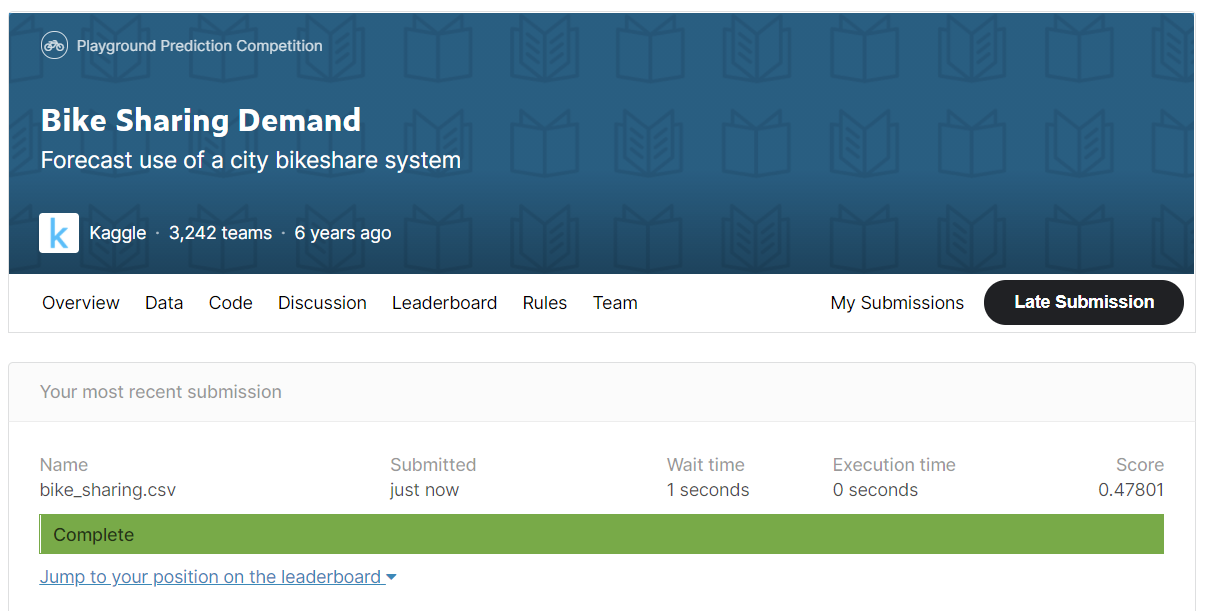

score가 0에 가까우면 퍼포먼스가 높다.

현제 캐글 1등 기준 0.33이며 3300명 중 우리팀의 등수는 1200등이다

### 팀명 : 교수님 소고기 사주세요,,,